In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
image = cv2.imread("Data/Images/Test 2.jpg")

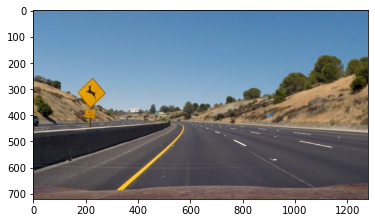

In [73]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

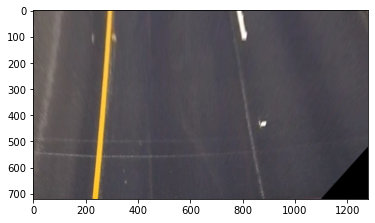

In [166]:
#Getting the appropriate Region of Interest as an Image
src_points = np.array([[107, 660], [1173, 660], [853, 480], [427, 480]]).astype(np.float32)
dst_points = np.array([[0,0], [1000, 0], [1000, 1000],  [0, 1000]]).astype(np.float32)
M = cv2.getPerspectiveTransform(src_points, dst_points)
Minv = cv2.getPerspectiveTransform(dst_points, src_points)
warped = cv2.flip(cv2.warpPerspective(image, M, (1280, 720),flags=cv2.INTER_LINEAR), 0)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

In [167]:
warped_hsv = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV)
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [176]:
h, s, v = cv2.split(warped_hsv)

In [177]:
white_mask = (s < 30) & (v > 200)
yellow_mask = (80 < h) & (h < 120) & (140 < s) & (s < 255) & (100 < v) & (v < 255)
lane_mask = white_mask | yellow_mask

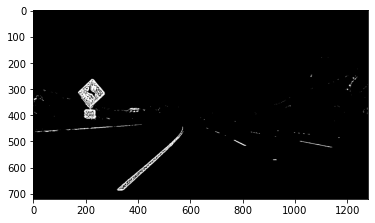

In [178]:
plt.imshow(lane_mask, cmap = 'gray')

In [179]:
lane_image_mask = np.zeros((lane_mask.shape[0],lane_mask.shape[1]))
lane_image_mask[lane_mask == True] = 255
lane_image_mask = cv2.fillPoly()

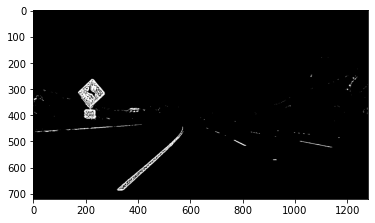

In [180]:
plt.imshow(lane_image_mask, cmap = 'gray')